In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("pokemon.csv")
print(df.shape)
df.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


## Some Categorical Variables

#### generation_id

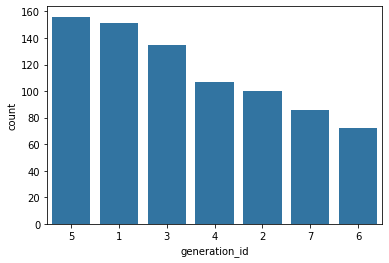

In [14]:
gen_count = df.generation_id.value_counts()
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='generation_id', color=color, order=gen_count.index);

#### pokemon_type_1

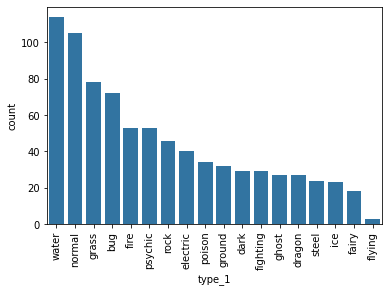

In [20]:
type_count = df.type_1.value_counts()
sb.countplot(data=df, x='type_1', color=base_color, order=type_count.index)
plt.xticks(rotation=90);

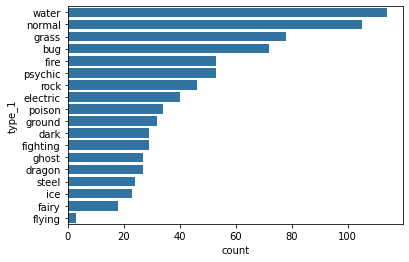

In [22]:
type_count = df.type_1.value_counts()
sb.countplot(data=df, y='type_1', color=base_color, order=type_count.index);

With relative frequencies instead of absolute frequencies

In [5]:
df.head(3)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100


In [44]:
pkmn_types = df.melt(id_vars = ['id', 'species'],
                     value_vars = ['type_1', 'type_2'],
                     var_name = 'type_level',
                     value_name = 'type'
                    )#.dropna()
pkmn_types

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
...,...,...,...,...
1609,803,poipole,type_2,NaN
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel
1612,806,blacephalon,type_2,ghost


In [45]:
type_counts = pkmn_types.type.value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

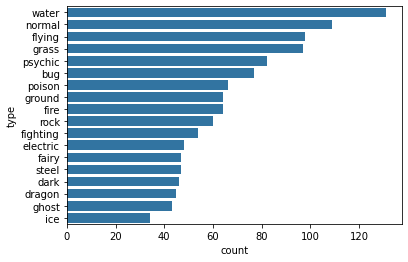

In [46]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_counts.index);

In [41]:
# Retourner la somme de toutes les valeurs non nulles de la colonne « type »
n_pokemon = pkmn_types['type'].value_counts().sum()

# Retourner la fréquence la plus élevée dans la colonne « type »
max_type_count = type_counts[0]

# Retourner la proportion maximale, ou en d'autres termes,
# calculer la longueur de la barre la plus longue en fonction de la proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [47]:
# Utiliser la fonction numpy.arange() pour produire un ensemble de valeurs proportionnelles uniformément espacées
# entre 0 et max_prop, avec un pas de 2\%.
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [48]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

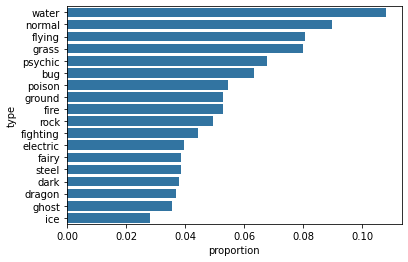

In [55]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_counts.index);
plt.xticks(tick_props * n_pokemon, tick_names) 
plt.xlabel('proportion');

Si je veux plutôt les counts sur les axes avec également les proportions sur la figure : 

In [65]:
type_counts[0] == type_counts['water']

True

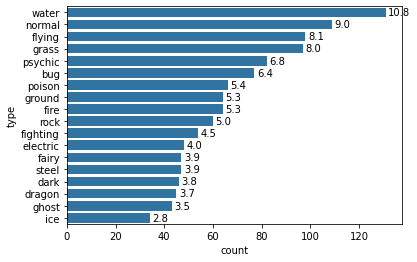

In [64]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_counts.index)

for i in range(len(type_counts)): # or type_counts.shape[0]
    prct_str = '{:0.1f}'.format((100 * type_counts[i])/n_pokemon)
    plt.text(type_counts[i]+1, i, prct_str, va='center')

## Some Quantitative Variables

#### speed

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

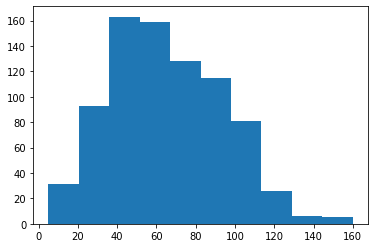

In [3]:
plt.hist(data=df, x='speed')

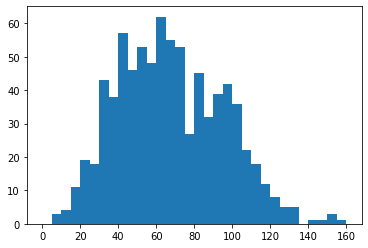

In [8]:
bins = np.arange(0, df['speed'].max()+5, 5)
plt.hist(data=df, x='speed', bins=bins);

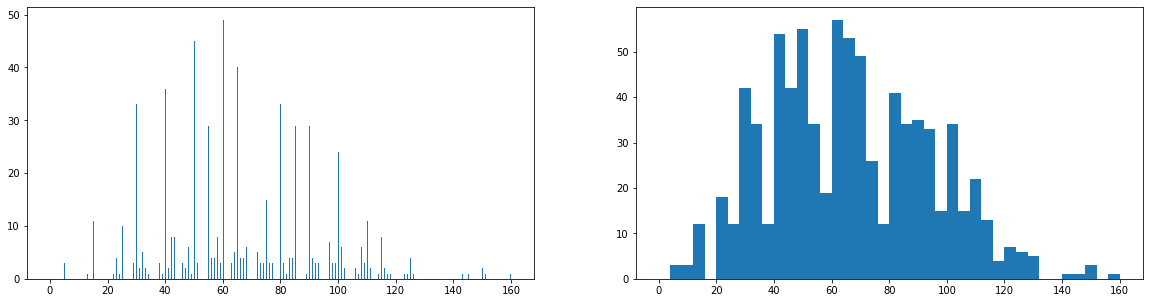

In [42]:
# créer des subplots pour voir la taille de bins appropriée
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, df['speed'].max()+1/4, 1/4)
plt.hist(data=df, x='speed', bins=bins);

plt.subplot(1, 2, 2)
bins = np.arange(0, df['speed'].max()+4, 4)
plt.hist(data=df, x='speed', bins=bins);

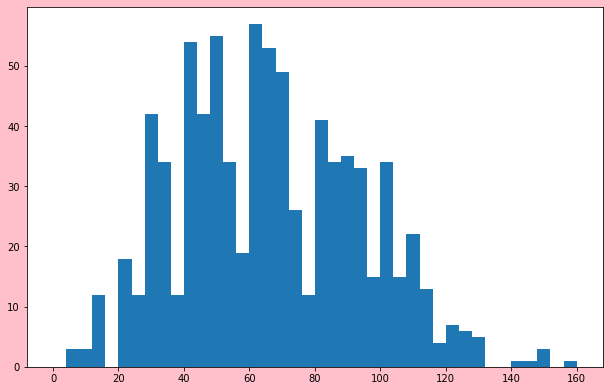

In [37]:
fig = plt.figure(figsize=[8, 5], facecolor='pink')
ax = fig.add_axes([.7, .3, 1., 1.])
bins = np.arange(0, df['speed'].max()+4, 4)
ax.hist(data=df, x='speed', bins=bins);

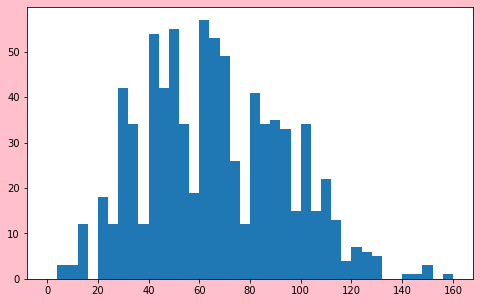

In [26]:
fig = plt.figure(figsize=[8, 5], facecolor='pink')
ax = fig.add_axes([.125, .125, .775, .755])
bins = np.arange(0, df['speed'].max()+4, 4)
plt.hist(data=df, x='speed', bins=bins);

#### height

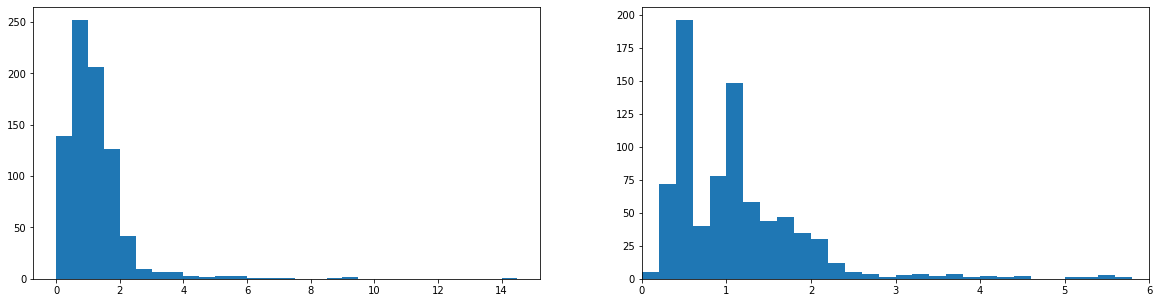

In [47]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, df['height'].max() + .5, .5)
plt.hist(data=df, x='height', bins=bins)

plt.subplot(1, 2, 2)
bins = np.arange(0, df['height'].max() + .2, .2)
plt.hist(data=df, x='height', bins=bins)
plt.xlim(0, 6);